In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

#### Solving Ordinary Differential Equation with Artificial Neural Network 

Our problem of interest is,
$$u'= 2x$$
$$u(0)=1$$

The analytical solution will look like,

$$\frac{du}{dx} = u'= 2x$$
$$ \int u' \,dx = \int 2x \,dx $$
$$ u = x^2 + C $$


By putting initial condition we get the final soution,
$$u=x^2 + 1$$

Here we are about to create a ODE solver with Neural Network


In [60]:
# Given differential equation du/dx = 2x
def u_prime(x):
    return 2*x

# initial condition
u0 = 1


In [61]:
##########3 defining neural network ###########

epochs = 230
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

inputs = tf.keras.Input(name='inputs',shape=(1),dtype=tf.dtypes.float32)
hidden1 = tf.keras.layers.Dense(10,activation=tf.nn.sigmoid,name='hidden1')
hidden2 = tf.keras.layers.Dense(10,activation=tf.nn.sigmoid,name='hidden2')
output = tf.keras.layers.Dense(1,activation=None,name='output')
model  = tf.keras.Sequential([inputs, hidden1,hidden2, output ])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 10)                20        
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


training going on...... Please wait!


Training complete.Loss behaviour is like,


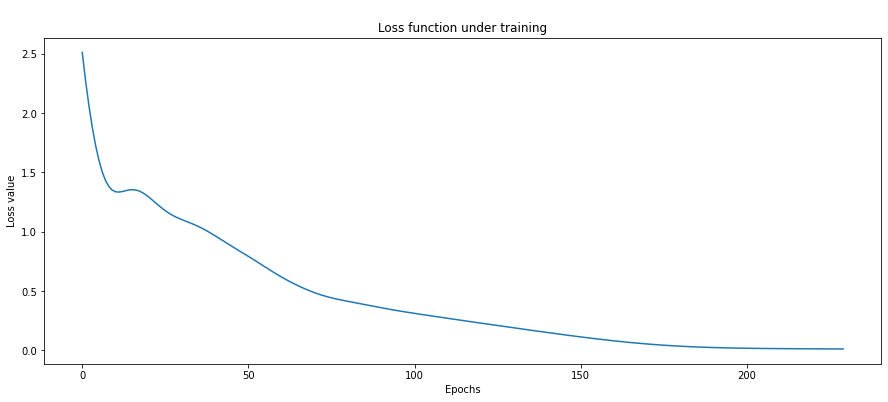

In [62]:
#############  solving ODE with DNN  #############

x = tf.constant(np.linspace(0,1,100,endpoint=True),dtype=float)

trainable_vars = model.trainable_variables
losses = []


print("training going on...... Please wait!\n")

for i in range(epochs):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(trainable_vars)
        u = model(x,training=True)
        du_dx = tape.gradient(u,x)   
        i_loss = (du_dx - u_prime(x))**2
        loss  =  tf.reduce_mean(i_loss) +(u[0]-u0)**2
        tape.watch(loss)

    gradients = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(gradients, trainable_vars))
    losses.append(loss.numpy()[0])


###########  Plotting loss behaviour  #####################

print("\nTraining complete.Loss behaviour is like,")
plt.figure(figsize=(15,6))
plt.title("\nLoss function under training")
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.plot(range(epochs),losses)
plt.show()


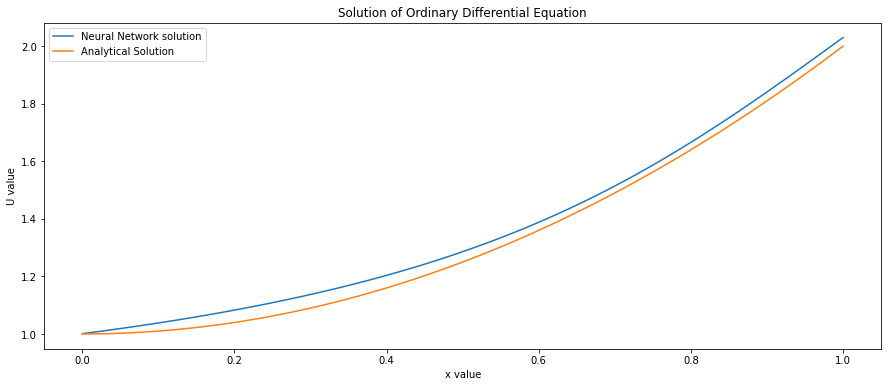

In [63]:
##############  plotting the solution ##########
plt.figure(figsize=(15,6))
plt.title("Solution of Ordinary Differential Equation")
plt.xlabel("x value")
plt.ylabel("U value")
plt.plot(x,u)
plt.plot(x,x**2 + 1)
plt.legend(["Neural Network solution",'Analytical Solution'])
plt.show()